导入需要的包。

In [25]:
import random
import torch
import matplotlib.pyplot as plt

使用 `torch.normal` 方法随机生成一个服从正态分布的数列，第一个参数是期望值，第二个参数是方差，第三个参数是一个元组，表示生成矩阵的形状。

In [26]:
def synthetic_data(w, b, m, n):
    """
    生成 Y=wX+b+noise 
    
    :param w: weight vector 
    :param b: bias scalar
    :param m: number of samples
    :param n: number of features
    :return: Y, labels value vector
    """
    # 生成一个期望值为0，方差为1，m*n的input features
    X = torch.normal(0, 1, (m, n))
    Y = X @ w.reshape(n, 1) + b
    
    # 噪声
    Y += torch.normal(0, 0.1, (m, 1))
    
    return X, Y.reshape(-1, 1)

w = torch.tensor([2, -3.4])
b = 4.2
features, labels = synthetic_data(w, b, 100, len(w))

print(features)
print(labels)

tensor([[-0.0350,  0.5147],
        [ 0.3590, -0.1108],
        [ 1.1351, -0.1369],
        [-0.1492,  0.4410],
        [-1.4734,  2.0153],
        [-2.4284,  0.2834],
        [-0.2795,  0.7825],
        [ 0.7150,  1.2277],
        [ 0.7087, -0.2749],
        [-0.8387,  1.7981],
        [-1.1597,  0.2537],
        [ 0.8081, -1.0250],
        [-2.6984,  0.7458],
        [-0.9388,  0.7567],
        [-0.3940,  1.0200],
        [-1.0433, -0.0908],
        [-1.2139,  0.9463],
        [ 0.2413, -0.2193],
        [ 0.9507,  0.1576],
        [-1.0583, -1.3143],
        [-0.5022,  1.2754],
        [ 0.4577, -0.4561],
        [-0.0315, -0.9510],
        [-1.4202, -1.4740],
        [-1.1089,  0.3942],
        [-0.2337, -0.1061],
        [-0.0687,  1.4090],
        [ 0.2125, -0.2198],
        [-0.5473,  0.5430],
        [ 1.7634, -1.3193],
        [-0.0524, -2.9558],
        [-0.2326, -0.8475],
        [-0.4723,  0.2419],
        [-0.7210,  1.1403],
        [-1.1229, -0.6549],
        [ 0.1966, -0

得到的features, labels就是人造数据集的输入特征和标签。我们可以画出输入特征的散点图。

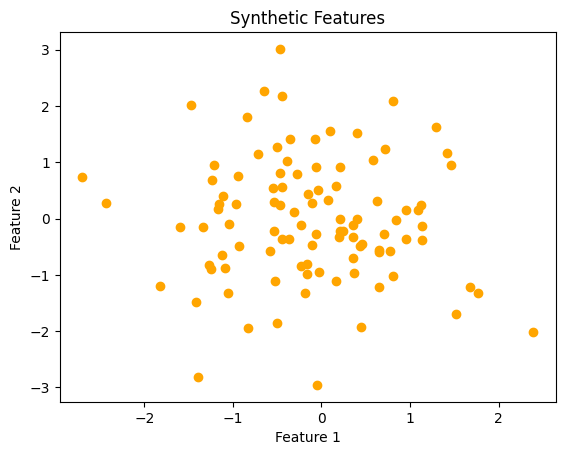

In [27]:
plt.figure()

plt.scatter(features[:, 0], features[:, 1], color='orange')

plt.title('Synthetic Features')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.show()